# Project 9 - Deep RL
Γεώργιος Δάλλας
ΑΕΜ: 217

## 1.
First the libraries for the project are installed.

In [32]:
!pip install swig


In [33]:
!pip install gymnasium[box2d]

In [34]:
!pip install renderlab

## 2.
- The step function in gmynasium is used to move from one time step (state) to the next (state) using an action. It returns the observation space aka the environment after the step, the reward of the action taken, an information dictionary and booleans for checking if the agent reaches a terminal or truncated state.
- The reset function resets the environment to the initial state. So it returns the starting observation + info. 
- The render function computes the render frames. When human render mode is selected for example, the environment is continuously rendered and displayed in terminal for "human consumption".

## 3.
LunarLander-v3 
- Observation Space = 8d vector containing: cords of lander (x,y), linear velocities x n y, its angle, its angular velocity and finally 2 booleans that are true when each leg makes contant with the ground.

- Action Space = 0 to 4 discrete number. 0 is do nothing , 1 fire left orrianted engine, 2 is fire main engine and 3 is fire right orientation engine.

- Reward function = for each step in an episode the reward:
    is increased/decreased the closer/further the lander is to the landing pad.

    is increased/decreased the slower/faster the lander is moving.

    is decreased the more the lander is tilted (angle not horizontal).

    is increased by 10 points for each leg that is in contact with the ground.

    is decreased by 0.03 points each frame a side engine is firing.

    is decreased by 0.3 points each frame the main engine is firing.

    The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.
    The episode is considered solved when it has at least 200 points.

## 4.
Random agent + renderlab in landing

In [35]:
import gymnasium as gym
import renderlab as rl
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env,"./output")


observation, info = env.reset() #starting environment

total_reward = 0.0  # episode score
while True:
    
    action = env.action_space.sample()

    
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    if terminated or truncated:
        break

env.play()
# get reward
print("Reward:", total_reward)

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward: -163.92242921520494


## 5. 
5 episodes of random for mean score

In [36]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env,"./output")
scores = []
for i in range(5):
    observation, info = env.reset() #starting environment
    total_reward = 0.0  # episode score
    while True:
        
        action = env.action_space.sample()

        
        observation, reward, terminated, truncated, info = env.step(action)

        total_reward += reward
        if terminated or truncated:
            break

    #env.play()
    scores.append(total_reward)
print("Average Reward over 5 episodes:", sum(scores)/5)

Average Reward over 5 episodes: -224.7972741124733


## 6.
Using stable baselines library, DQN and PPO are now used to actually learn which actions to take at each step.

In [41]:
from stable_baselines3 import DQN, PPO


env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env,"./output")

model = DQN("MlpPolicy", env, verbose=0,device="cuda")
model.learn(total_timesteps=20000)
observation, info = env.reset() #starting environment
total_reward = 0.0  # episode score
while True:
    action, _states = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break
env.play()
# get reward
print("Reward DQN:", total_reward)

env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env,"./output")

model = PPO("MlpPolicy", env, verbose=0,device="cuda")
model.learn(total_timesteps=20000)
observation, info = env.reset() #starting environment
total_reward = 0.0  # episode score

while True:
    action, _states = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break
env.play()
# get reward
print("Reward PPO:", total_reward)


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward DQN: -165.6995139731916
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward PPO: -2782.8564287637914


## 7.
testing the 2 algorithms on 5 episodes after training

DQN: Avg Reward = -188.69330146176193 , Training Time = 35.96163368225098
PPO: Avg Reward = -977.8199894273994 , Training Time = 77.64492893218994


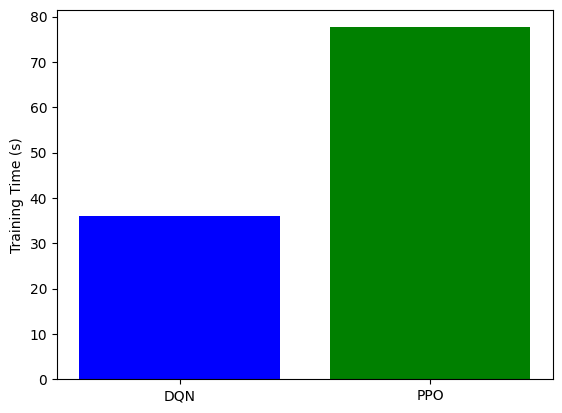

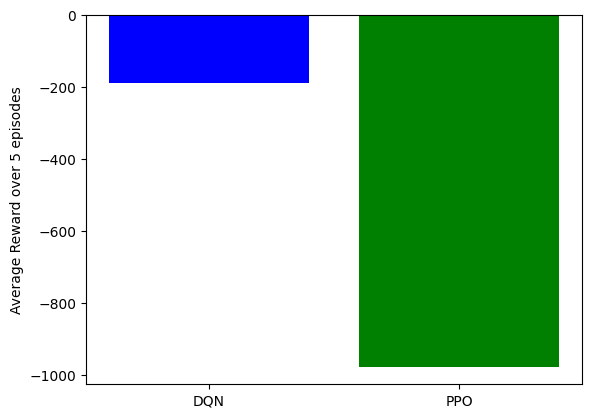

In [42]:
import time
import matplotlib.pyplot as plt

scores = []
train_time = []


def train_eval(agent_class):
    env = gym.make("LunarLander-v3", render_mode="rgb_array")

    start = time.time()
    model = agent_class("MlpPolicy", env, verbose=0,device="cuda")
    model.learn(total_timesteps=20000)
    training_time = time.time() - start
    
    # Eval 5 episodes
    scores = []
    for _ in range(5):
        obs, _ = env.reset()
        total = 0
        done = False
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            total += reward
            done = terminated or truncated
        scores.append(total)
    
    avg_reward = sum(scores)/5
    return avg_reward, training_time




avg_dqn, time_dqn = train_eval(DQN)

avg_ppo, time_ppo = train_eval(PPO)

print("DQN: Avg Reward =", avg_dqn, ", Training Time =", time_dqn)
print("PPO: Avg Reward =", avg_ppo, ", Training Time =", time_ppo)

#time comparison plot
plt.bar(['DQN','PPO'], [time_dqn, time_ppo], color=['blue','green'])
plt.ylabel("Training Time (s)")
plt.show()

#reward comparison plot
plt.bar(['DQN','PPO'], [avg_dqn, avg_ppo], color=['blue','green'])
plt.ylabel("Average Reward over 5 episodes")
plt.show()

## 8.
after searching in the internet for optimal hyperparameters, the models are retrained demonstrated and tested on 5 episodes.

In [43]:



env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env,"./output")
learning_rate = 0.001
model = DQN("MlpPolicy",
            env,
            learning_rate=learning_rate,
            batch_size=32,          
            buffer_size=5000,       
            learning_starts=100,
            gamma=0.99,
            tau=1.0,
            target_update_interval=100,
            train_freq=(4, "step"),
            gradient_steps=4,
            verbose=0,
            device="cuda")  

model.learn(total_timesteps=50000)
observation, info = env.reset() #starting environment
total_reward = 0.0  # episode score
while True:
    action, _states = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break
env.play()
# get reward
print("Reward DQN:", total_reward)

env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env,"./output")

model = PPO("MlpPolicy", env,
            learning_rate=learning_rate,
            gamma=0.99,  
            gae_lambda=0.95,  
            clip_range=0.2, 
            ent_coef=0.0, 
            vf_coef=0.5,  
            max_grad_norm=10,  
            seed=1,  
            verbose=0,
            policy_kwargs=dict(net_arch=[64, 64]) )
model.learn(total_timesteps=50000)
observation, info = env.reset() #starting environment
total_reward = 0.0  # episode score

while True:
    action, _states = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break
env.play()
# get reward
print("Reward PPO:", total_reward)





Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward DQN: 27.36036457402775
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward PPO: -130.247487671037


DQN: Avg Reward = 175.7412370490512 , Training Time = 245.31431579589844
PPO: Avg Reward = -142.61069120028134 , Training Time = 185.96363592147827


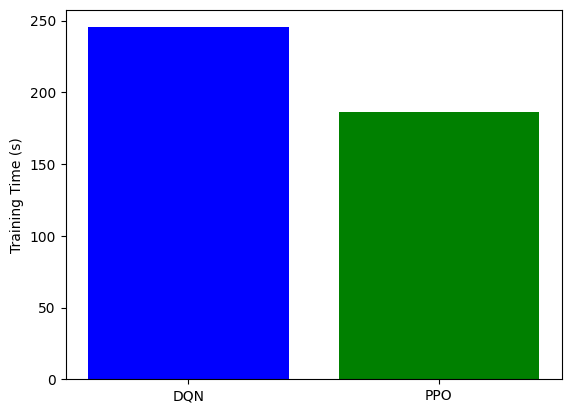

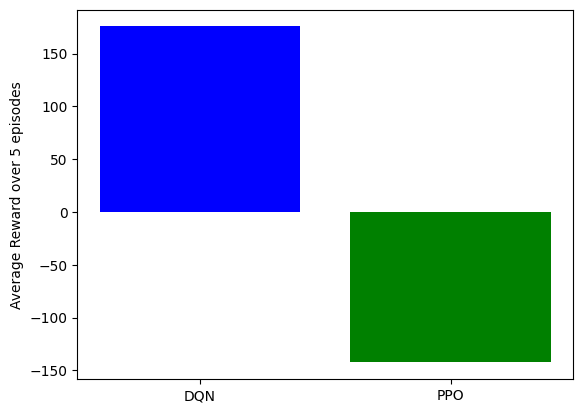

In [44]:
scores = []
train_time = []

def train_eval(agent_class):
    env = gym.make("LunarLander-v3", render_mode="rgb_array")

    
    if agent_class == DQN:
        model = agent_class("MlpPolicy", env,
                            learning_rate=0.001,
                            batch_size=32,
                            buffer_size=5000,
                            learning_starts=100,
                            gamma=0.99,
                            tau=1.0,
                            target_update_interval=100,
                            train_freq=(4,"step"),
                            gradient_steps=4,
                            verbose=0,
                            device="cuda")
    else:  
        model = agent_class("MlpPolicy", env,
                            learning_rate=0.001,
                            gamma=0.99,
                            gae_lambda=0.95,
                            clip_range=0.2,
                            ent_coef=0.0,
                            vf_coef=0.5,
                            max_grad_norm=10,
                            seed=1,
                            verbose=0,
                            device="cuda",
                            policy_kwargs=dict(net_arch=[64,64]))
    
    start = time.time()
    model.learn(total_timesteps=50000)
    training_time = time.time() - start
    

    scores = []
    for _ in range(5):
        obs, _ = env.reset()
        total = 0
        done = False
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            total += reward
            done = terminated or truncated
        scores.append(total)
    
    avg_reward = sum(scores)/5
    return avg_reward, training_time

avg_dqn, time_dqn = train_eval(DQN)
avg_ppo, time_ppo = train_eval(PPO)
print("DQN: Avg Reward =", avg_dqn, ", Training Time =", time_dqn)
print("PPO: Avg Reward =", avg_ppo, ", Training Time =", time_ppo)
#time comparison plot
plt.bar(['DQN','PPO'], [time_dqn, time_ppo], color=['blue','green'])
plt.ylabel("Training Time (s)")
plt.show()

#reward comparison plot
plt.bar(['DQN','PPO'], [avg_dqn, avg_ppo], color=['blue','green'])
plt.ylabel("Average Reward over 5 episodes")
plt.show()


## the results show that the models are underfitted, doubling the total timesteps will make the models interact twice as many times with the environment making them learn better.

In [49]:



env = gym.make("LunarLander-v3")

learning_rate = 0.001
model = DQN("MlpPolicy",
            env,
            learning_rate=learning_rate,
            batch_size=32,          
            buffer_size=5000,       
            learning_starts=100,
            gamma=0.99,
            tau=1.0,
            target_update_interval=100,
            train_freq=(4, "step"),
            gradient_steps=4,
            verbose=0,
            device="cuda")  

model.learn(total_timesteps=100000)
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env,"./output")
observation, info = env.reset() #starting environment
total_reward = 0.0  # episode score
while True:
    action, _states = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break


env.play()
# get reward
print("Reward DQN:", total_reward)

env = gym.make("LunarLander-v3")


model = PPO("MlpPolicy", env,
            learning_rate=learning_rate,
            gamma=0.99,  
            gae_lambda=0.95,  
            clip_range=0.2, 
            ent_coef=0.0, 
            vf_coef=0.5,  
            max_grad_norm=10,  
            seed=1,  
            verbose=0,
            policy_kwargs=dict(net_arch=[64, 64]) )
model.learn(total_timesteps=100000)
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env,"./output")
observation, info = env.reset() #starting environment
total_reward = 0.0  # episode score

while True:
    action, _states = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break
env.play()
# get reward
print("Reward PPO:", total_reward)





Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward DQN: 206.5588964083836
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward PPO: -88.93394760825028
